# ***Metropolis Monte Carlo Algorithm for Creating The Normal Distribution***

## *importing the modules and packages, Configuration of the Figs*

In [212]:
include("Q3-Metropolis-MC.jl")
using Plots, LaTeXStrings, StatsPlots, StatsBase, Distributions, JLD, ProgressMeter
figpath = "../../Figs/Q3/"
datapath = "../../Data/Q3/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

## *Showing the Distribution*

In [213]:
Parameters = Dict(
    :P => x -> ℯ^(-x^2 / 2),
    :x₀ => 0.0,
    :Δ => 2.94,
    :Steps => 10^6)

Series, aᵣ = Metropolis.metropolis(; Parameters...)
save(datapath * "Fig1_data.jld", "Series", Series)

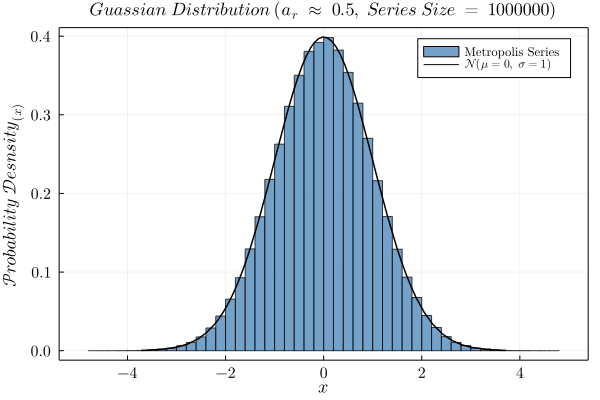

In [214]:
NormalHist = begin
    histogram(Series, bins = 75, normalize = true, c = :steelblue, label = "Metropolis Series", alpha = 0.75)
    plot!(Normal(0, 1), label = L"\mathcal{N}(\mu =0 ,\ \sigma =1)", c = :black, linewidth = 1.5)
    plot!(xlabel = L"x", ylabel = L"\mathcal{Probability\ Desnsity}_{(x)}",
        title = L"Guassian\ Distribution\ (a_r\ \approx\ 0.5,\ Series\ Size\ =\ %$(Parameters[:Steps]))")
end
savefig(NormalHist, figpath * "NormalHist.pdf")
display(NormalHist)

## *Acceptance Rate per $\Delta$*

In [215]:
N = 1000
aᵣData = Float64[]
ΔList = collect(range(0.01, 100, length = N))
Prog = Progress(N)
for n ∈ 1:N
    Parameters = Dict(
        :P => x -> ℯ^(-x^2 / 2),
        :x₀ => 0.0,
        :Δ => ΔList[n],
        :Steps => 10^6)
    push!(aᵣData, Metropolis.metropolis(; Parameters...)[2])
    next!(Prog)
end
save(datapath * "ar_data.jld", "aᵣ", [ΔList aᵣData])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


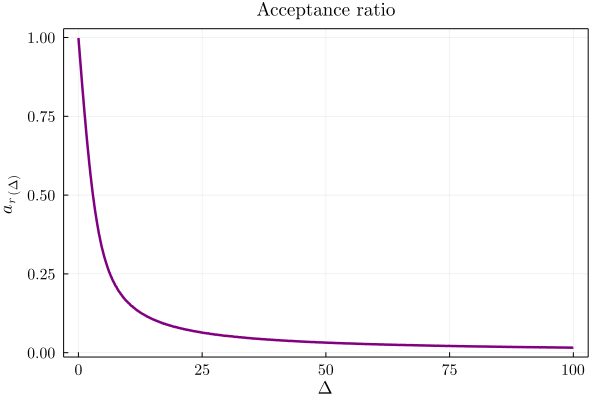

In [216]:
aᵣplot = plot(ΔList, aᵣData, xlabel = L"\Delta", ylabel = L"{\mathcal{a_r}}_{(\Delta)}", title = "Acceptance ratio", c = :purple, linewidth = 2.5)
savefig(aᵣplot, figpath * "AcceptanceRatio.pdf")
display(aᵣplot)

## *Autocorrelation*

In [217]:
aᵣList = Float64[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
ΔList = Float64[0.5, 1.02, 1.58, 2.2, 2.94, 3.87, 5.25, 7.95, 15.9]
CⱼList = []
Prog = Progress(9)
for n ∈ 1:9
    Parameters = Dict(
        :P => x -> ℯ^(-x^2 / 2),
        :x₀ => 0.0,
        :Δ => ΔList[n],
        :Steps => 10^7)
    push!(CⱼList, autocor(Metropolis.metropolis(; Parameters...)[1]))
    next!(Prog)
end
save(datapath * "Cj_data.jld", "Cⱼ", CⱼList)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


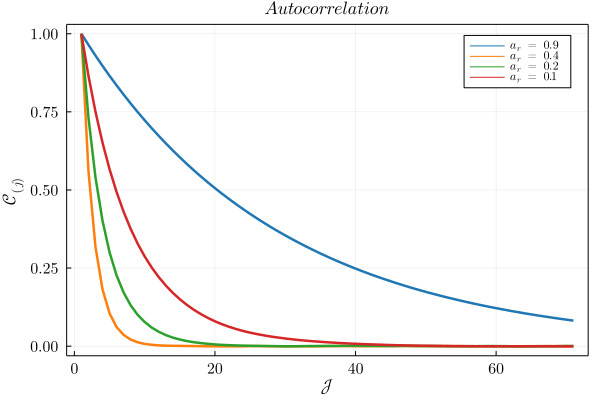

In [218]:
indexList = [1, 6, 8, 9]
CⱼPlot = begin
    plot(xlabel = L"\mathcal{J}", ylabel = L"\mathcal{C}_{(j)}")
    for indx ∈ indexList
        plot!(1:length(CⱼList[indx]), CⱼList[indx], label = L"a_r\ =\ %$(aᵣList[indx])", linewidth = 2.5, palette = :tab10)
    end
    plot!(title = L"Autocorrelation")
end
savefig(CⱼPlot, figpath * "Autocorrelation1.pdf")
display(CⱼPlot)

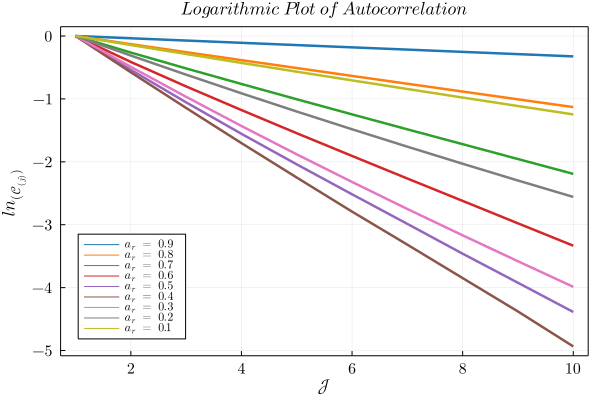

In [219]:
lnCⱼPlot = begin
    plot(xlabel = L"\mathcal{J}", ylabel = L"\mathcal{ln}_{(\mathcal{C}_{(j)})}")
    for indx ∈ 1:9
        plot!(1:10, log.(CⱼList[indx][1:10]), label = L"a_r\ =\ %$(aᵣList[indx])", linewidth = 2.5, palette = :tab10)
    end
    plot!(title = L"Logarithmic\ Plot\ of\ Autocorrelation", legend = 195)
end
savefig(lnCⱼPlot, figpath * "Autocorrelation2.pdf")
display(lnCⱼPlot)

## *Correlation Length*

In [220]:
LogCL = [log.(cor[1:10]) for cor in CⱼList]
ξList = Float64[]

x = collect(1:10)
Prog = Progress(9)
for y ∈ LogCL
    ξ⁻¹, Const = hcat(x, ones(10)) \ y
    ξ = -1 / ξ⁻¹
    push!(ξList, ξ)
    next!(Prog)
end
save(datapath * "Xi_data.jld", "ξ", ξList)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


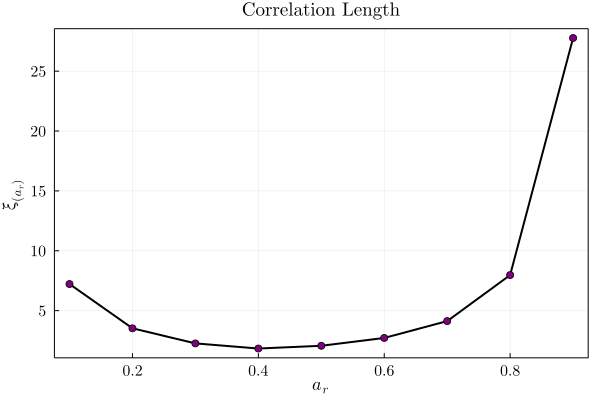

In [221]:
CorLenPLot = begin
    plot(aᵣList, ξList,
        title = "Correlation Length",
        xlabel = L"a_r", ylabel = L"\mathcal{\xi}_{(a_r)}",
        linewidth = 2,
        c = :black)
    scatter!(aᵣList, ξList, c = :purple)
end
savefig(CorLenPLot, figpath * "CorrelationLength.pdf")
display(CorLenPLot)